In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

## 读入图像并转为单通道

(334, 500, 3)


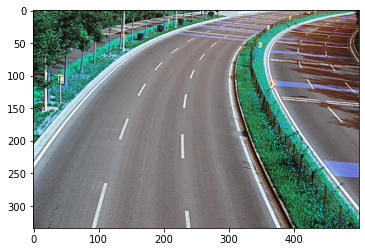

In [33]:
binary_warped = cv2.imread('line2.jpg')
plt.imshow(binary_warped)
print(binary_warped.shape)

In [34]:
binary_gray = cv2.cvtColor(binary_warped, cv2.COLOR_BGR2GRAY)
print(binary_gray.shape)

(334, 500)


## 根据直方图峰值确定车道线

In [35]:
histogram = np.sum(binary_gray[binary_gray.shape[0]//2:,:], axis = 0)
print(type(histogram))

<class 'numpy.ndarray'>


In [36]:
print(histogram.shape)

(500,)


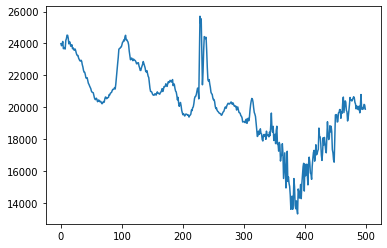

In [37]:
plt.plot(histogram)

In [38]:
midpoint = np.int(histogram.shape[0]//2)
print(type(midpoint))
print(midpoint)

<class 'int'>
250


In [39]:
leftx_base = np.argmax(histogram[:midpoint])
rightx_base = np.argmax(histogram[midpoint:]) + midpoint
print(leftx_base)
print(rightx_base)

228
492


In [40]:
nwindows = 9
window_height = np.int(binary_gray.shape[0]//nwindows)
nonzero = binary_gray.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
print(len(nonzero))

2


In [41]:
print(type(nonzerox))
print(nonzerox.shape)
print(nonzerox[:1000])

<class 'numpy.ndarray'>
(166986,)
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 

In [42]:
leftx_current = leftx_base
rightx_current = rightx_base

In [43]:
margin = 100
minpix = 50
left_lane_inds = []
right_lane_inds = []

In [44]:
for window in range(nwindows):
    win_y_low = binary_gray.shape[0] - (window+1)*window_height
    win_y_high = binary_gray.shape[0] - window*window_height
    
    win_xleft_low = leftx_current - margin
    win_xleft_high = leftx_current + margin
    
    win_xright_low = rightx_current - margin
    win_xright_high = rightx_current + margin
    
    cv2.rectangle(binary_warped,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0),2)
    cv2.rectangle(binary_warped,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0),2)
    
    #这一步让我感到很困惑
    good_left_inds = ((nonzeroy>=win_y_low) & (nonzeroy<win_y_high) & (nonzerox >= win_xleft_low) &
                      (nonzerox < win_xleft_high)).nonzero()[0]
    good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
                    (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
    left_lane_inds.append(good_left_inds)
    right_lane_inds.append(good_right_inds)
    
    if len(good_left_inds) > minpix:
        leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
    if len(good_right_inds) > minpix:        
        rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

In [45]:
# Concatenate the arrays of indices
left_lane_inds = np.concatenate(left_lane_inds)
right_lane_inds = np.concatenate(right_lane_inds)

# Extract left and right line pixel positions
leftx = nonzerox[left_lane_inds]
lefty = nonzeroy[left_lane_inds] 
rightx = nonzerox[right_lane_inds]
righty = nonzeroy[right_lane_inds] 

# Fit a second order polynomial to each
left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)

(720.0, 0.0)

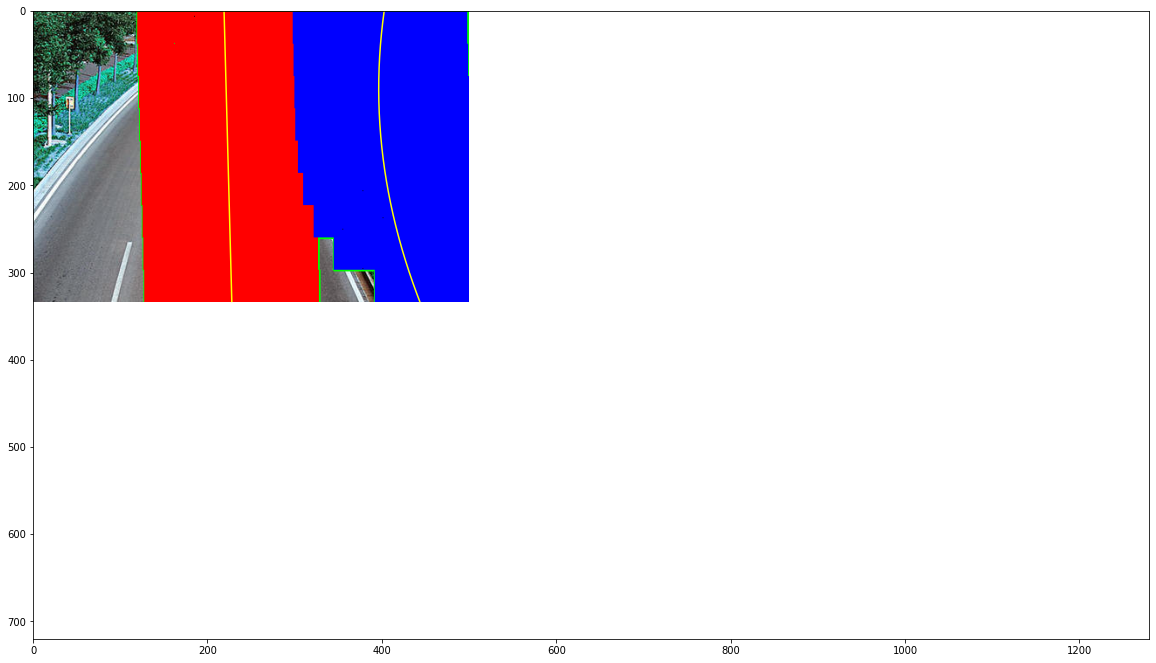

In [46]:
ploty = np.linspace(0, binary_gray.shape[0]-1, binary_gray.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

binary_warped[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
binary_warped[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
plt.figure(figsize=(20,14))
plt.imshow(binary_warped)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)

In [47]:
# Assume you now have a new warped binary image 
# from the next frame of video (also called "binary_warped")
# It's now much easier to find line pixels!
nonzero = binary_gray.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
margin = 100
left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + 
left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + 
left_fit[1]*nonzeroy + left_fit[2] + margin))) 

right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + 
right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + 
right_fit[1]*nonzeroy + right_fit[2] + margin)))  

# Again, extract left and right line pixel positions
leftx = nonzerox[left_lane_inds]
lefty = nonzeroy[left_lane_inds] 
rightx = nonzerox[right_lane_inds]
righty = nonzeroy[right_lane_inds]
# Fit a second order polynomial to each
left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)
# Generate x and y values for plotting
ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

[[[375.91293414   0.        ]
  [375.56608014   1.        ]
  [375.21954026   2.        ]
  ...
  [575.21954026   2.        ]
  [575.56608014   1.        ]
  [575.91293414   0.        ]]]
[[[1.01592368e+03 0.00000000e+00]
  [1.01543531e+03 1.00000000e+00]
  [1.01494782e+03 2.00000000e+00]
  ...
  [1.21494782e+03 2.00000000e+00]
  [1.21543531e+03 1.00000000e+00]
  [1.21592368e+03 0.00000000e+00]]]


(720, 0)

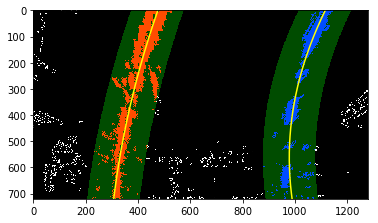

In [21]:
out_img = np.dstack((binary_gray, binary_gray, binary_gray))*255
window_img = np.zeros_like(out_img)
# Color in left and right line pixels
out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

# Generate a polygon to illustrate the search window area
# And recast the x and y points into usable format for cv2.fillPoly()
left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, 
                              ploty])))])
left_line_pts = np.hstack((left_line_window1, left_line_window2))
print(left_line_pts)
right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, 
                              ploty])))])
right_line_pts = np.hstack((right_line_window1, right_line_window2))
print(right_line_pts)

# Draw the lane onto the warped blank image
cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
plt.imshow(result)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)

In [23]:
print(left_line_window1.shape)
left_line_window1

(1, 720, 2)


array([[[375.91293414,   0.        ],
        [375.56608014,   1.        ],
        [375.21954026,   2.        ],
        ...,
        [207.84610156, 717.        ],
        [207.724464  , 718.        ],
        [207.60314054, 719.        ]]])

In [26]:
print(left_line_window2.shape)
left_line_window2

(1, 720, 2)


array([[[407.60314054, 719.        ],
        [407.724464  , 718.        ],
        [407.84610156, 717.        ],
        ...,
        [575.21954026,   2.        ],
        [575.56608014,   1.        ],
        [575.91293414,   0.        ]]])

In [27]:
left_line_pts.shape

(1, 1440, 2)

In [30]:
print(left_line_pts[:,715:725,:])

[[[208.09031901 715.        ]
  [207.96805323 716.        ]
  [207.84610156 717.        ]
  [207.724464   718.        ]
  [207.60314054 719.        ]
  [407.60314054 719.        ]
  [407.724464   718.        ]
  [407.84610156 717.        ]
  [407.96805323 716.        ]
  [408.09031901 715.        ]]]
